<a href="https://colab.research.google.com/github/Analaurasil/Trabalho-Analise-de-Dados/blob/main/Trabalho_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**ATIVIDADE AVALIATIVA I**
ANA LAURA SILVEIRA DA SILVA BT3031837


---
1. **INTRODUÇÃO**

Para desenvolvimento dessa atividade foram escolhidas as variáveis **Gênero** e a profissão **Pesquisador**.
A proposta é analisar a relação de gênero no contexto da profissão de pesquisador, através de uma análise aprofundada dos dados.

A escolha de tais varivais se deve a inferencia empirica de que as mulheres pesquisadoras não tem a mesma notoriedade dos pesquisadores homens e que tal fato iria se refletir na base de dados estudada.


A base de dados utilizada como objeto de estudo desse trabalho conta com as colunas:

* Id
* Name = Nome
* Short description = Curta Descrição
* Gender = Gênero
* Country = País
* Occupation = Profissão
* Birth year = Ano de Nascimento
* Death year = Ano da Morte
* Manner of death = Causa da Morte
* Age of death = Idade da Morte

Totalizando 10 colunas e 1.223.009 linhas de dados.

1.1. CONHECENDO A BASE DE DADOS






In [ ]:
#IMPORTANDO AS BIBLIOTECAS UTILIZADAS PARA A ATIVIDADE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from google.colab import drive

In [ ]:
#ADICIONANDO A BASE DE DADOS
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Colab Notebooks/Trabalho 1/age_dataset.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#CARREGANDO O DATAFREME
dados = pd.read_csv(path, sep=',')

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0
5,Q260,Jean-François Champollion,French classical scholar,Male,Kingdom of France; First French Empire,Egyptologist,1790,1832.0,natural causes,42.0
6,Q272,Paul Morand,French writer,Male,France,Artist,1888,1976.0,NaN,88.0
7,Q296,Claude Monet,French impressionist painter (1840-1926),Male,France,Artist,1840,1926.0,natural causes,86.0
8,Q297,Diego Velázquez,Spanish painter (1599-1660),Male,Spain,Artist,1599,1660.0,NaN,61.0
9,Q301,El Greco,"Greek painter, sculptor and architect",Male,Spain; Republic of Venice,Artist,1541,1614.0,NaN,73.0


In [ ]:
#CONTABILIZAÇÃO DOS DADOS
n_linhas = dados.shape[0]
n_colunas = dados.shape[1]

print(f"Número de linhas: {n_linhas}")
print(f"Número de colunas: {n_colunas}")



Número de linhas: 1223009
Número de colunas: 10


In [ ]:
#CONHECENDO AS VÁRIAVEIS
dados.columns

Index(['Id', 'Name', 'Short description', 'Gender', 'Country', 'Occupation',
       'Birth year', 'Death year', 'Manner of death', 'Age of death'],
      dtype='object')

1.2 CLASSIFICANDO OS DADOS E ESTABELECENDO A CATEGORIA PESQUISADORES

In [ ]:
#FILTRANDO OS DADOS ESTABELECENDO "PESQUISADORES"
pesquisadores = dados[dados['Occupation'].str.contains('Researcher', case=False, na=False)]

In [ ]:
#CONTANDO A QUANTIDADE DE PESQUISADORES
n_pesquisadores = pesquisadores.shape[0]
print(f"Número de pesquisadores: {n_pesquisadores}")
print('')
#TABELA COM A QUANTIDADE DE PESQUISADORES NA BASE DE DADOS
pesquisadores['Occupation'].value_counts()


Número de pesquisadores: 90709



,count
Occupation,
Researcher,90709


In [ ]:
#ESTABELECENDO A FREQUENCIA DE PESQUISADORES EM RELAÇÃO AO GÊNERO
frequencia_pesquisadores_genero = pd.crosstab(pesquisadores['Occupation'], pesquisadores['Gender'])

frequencia_pesquisadores_genero


Gender,Eunuch; Male,Female,Female; Male,Male,Transgender Female,Transgender Male
Occupation,,,,,,
Researcher,1,6501,1,75234,4,1


In [ ]:
#VERIFICANDO A EXISTÊNCIA DE DADOS NULOS EM PESQUISADORES
pesquisadores_nulos = pesquisadores.isnull().sum()

percentual_pesquisadores_nulos = (pesquisadores_nulos / len(pesquisadores)) * 100

tabela_pesquisadores_nulos = pd.DataFrame({

    "Total de Valores Nulos": pesquisadores_nulos,
    "Percentual de Nulos (%)": percentual_pesquisadores_nulos
})

tabela_pesquisadores_nulos

,Total de Valores Nulos,Percentual de Nulos (%)
Id,0,0.000000
Name,0,0.000000
Short description,875,0.964623
Gender,8967,9.885458
Country,19810,21.839068
Occupation,0,0.000000
Birth year,0,0.000000
Death year,0,0.000000
Manner of death,87792,96.784222
Age of death,0,0.000000


In [ ]:
#FAZENDO A LIMPEZA DOS PESQUISADORES
pesquisadores_limpos = pesquisadores.dropna(subset=['Gender'])

pesquisadores_limpos.isnull().sum()
pesquisadores = pesquisadores_limpos


In [ ]:
#REALIZANDO A VERIFICAÇÃO
pesquisadores = pesquisadores_limpos
pesquisadores.isnull().sum()

,0
Id,0
Name,0
Short description,487
Gender,0
Country,17540
Occupation,0
Birth year,0
Death year,0
Manner of death,78854
Age of death,0


In [ ]:
#REALIZANDO A LIMPEZA DE GÊNERO EM PESQUISADORES
filtro_genero = pesquisadores['Gender'].isin(['Male', 'Female'])

genero_filtrado = pesquisadores[filtro_genero]

pesquisadores = genero_filtrado

#VERIFICANDO A FREQUÊNCIA DE PESQUISADORE EM RELAÇÃO AO GÊNERO
frequencia_pesquisadores_genero = pd.crosstab(pesquisadores['Occupation'], pesquisadores['Gender'])

frequencia_pesquisadores_genero

Gender,Female,Male
Occupation,,
Researcher,6501,75234


2. ANÁLISE ESTATÍSTICA DESCRITIVA

2.1 DISTRIBUIÇÃO DE DADOS

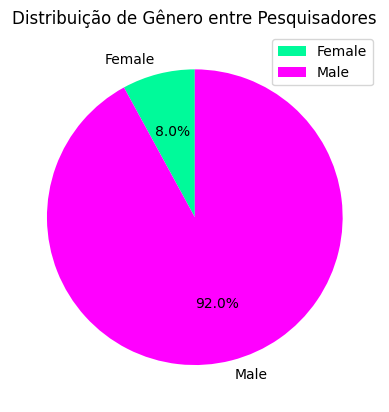

In [ ]:
#SOMA PARA CADA GÊNERO
contador_genero = frequencia_pesquisadores_genero.sum(axis=0)

#CRIANDO O GRÁFICO DE SETORES
plt.pie(contador_genero.values, labels=contador_genero.index, autopct='%1.1f%%', startangle=90, colors=['#00FA9A', '#FF00FF'])
plt.title('Distribuição de Gênero entre Pesquisadores')
plt.legend()
plt.show()

<ipython-input-136-a527f4d627b0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Age of death', data=pesquisadores, palette=cores)
<ipython-input-136-a527f4d627b0>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Birth year', data=pesquisadores, palette=cores)
<ipython-input-136-a527f4d627b0>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Death year', data=pesquisadores, palette=cores)


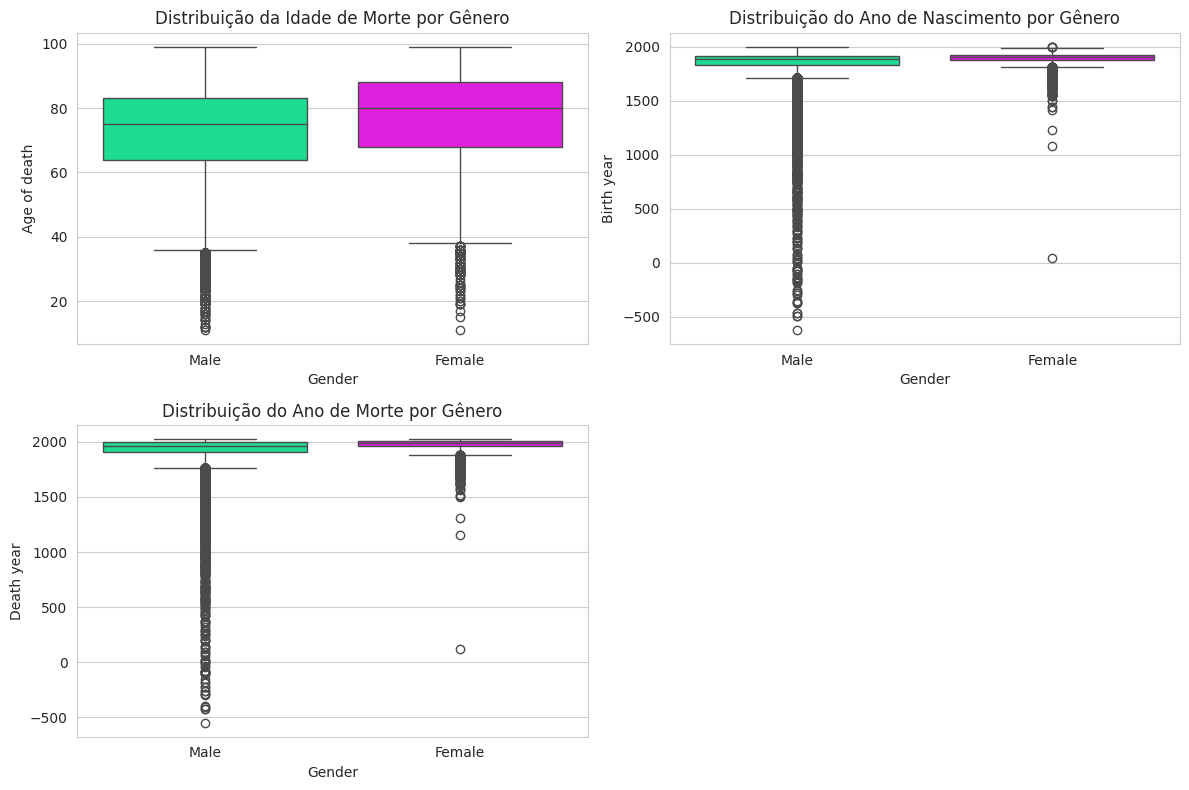

In [ ]:
#CRIANDO OS BOXPLOTS PARA AS VARIÁVEIS AGRUPADAS POR GÊNERO
cores = ['#00FA9A', '#FF00FF']
plt.figure(figsize=(12, 8))

# Idade de Morte
plt.subplot(2, 2, 1)
sns.boxplot(x='Gender', y='Age of death', data=pesquisadores, palette=cores)
plt.title('Distribuição da Idade de Morte por Gênero')

# Ano de Nascimento
plt.subplot(2, 2, 2)
sns.boxplot(x='Gender', y='Birth year', data=pesquisadores, palette=cores)
plt.title('Distribuição do Ano de Nascimento por Gênero')

# Ano de Morte
plt.subplot(2, 2, 3)
sns.boxplot(x='Gender', y='Death year', data=pesquisadores, palette=cores)
plt.title('Distribuição do Ano de Morte por Gênero')

plt.tight_layout()
plt.show()

In [ ]:
#ANO DE NASCIMENTO POR INTERVALO DE 20 ANOS
ano_inicial = 1800
ano_final = 2020
pesquisadores['Data_Nascimento_Intervalos'] = pd.cut(pesquisadores['Birth year'],
                                               bins=range(ano_inicial, ano_final + 20, 20),
                                               labels=[f'{i}-{i+20}' for i in range(ano_inicial, ano_final, 20)])

#CRIANDO A TABELA
frequencia_pesquisadores_data_nascimento_intervalos = pd.crosstab(pesquisadores['Gender'], pesquisadores['Data_Nascimento_Intervalos'])

print(frequencia_pesquisadores_data_nascimento_intervalos )

Data_Nascimento_Intervalos  1800-1820  1820-1840  1840-1860  1860-1880  \
Gender                                                                   
Female                            112        186        340        646   
Male                             3899       4641       6730       8578   

Data_Nascimento_Intervalos  1880-1900  1900-1920  1920-1940  1940-1960  \
Gender                                                                   
Female                           1043       1680       1612        587   
Male                             9405      13043      13737       3174   

Data_Nascimento_Intervalos  1960-1980  1980-2000  
Gender                                            
Female                             68          6  
Male                              282         19  


<ipython-input-30-9c890c76fc96>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pesquisadores['Data_Nascimento_Intervalos'] = pd.cut(pesquisadores['Birth year'],


<ipython-input-36-008ddfe9da41>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dados_por_genero = pesquisadores.groupby(['Gender', 'Data_Nascimento_Intervalos']).size().unstack()


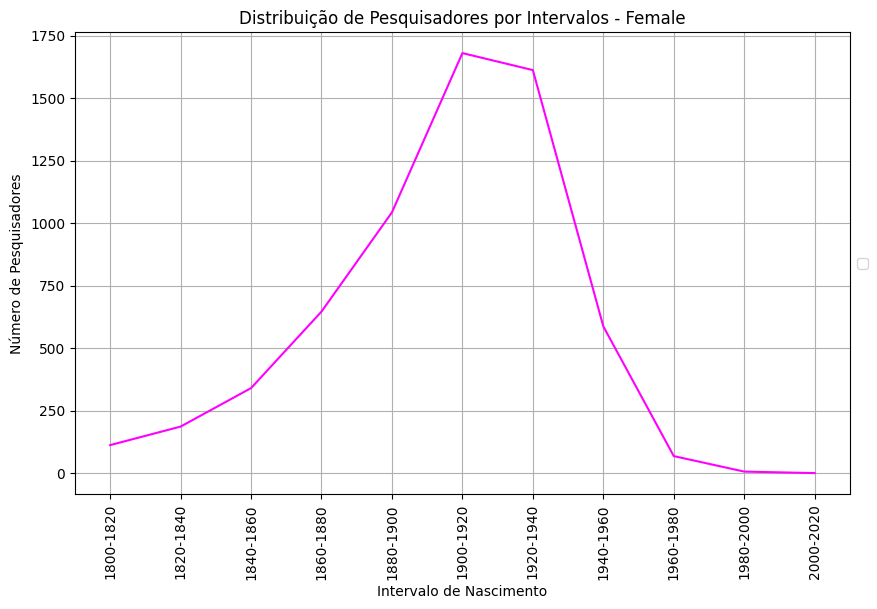

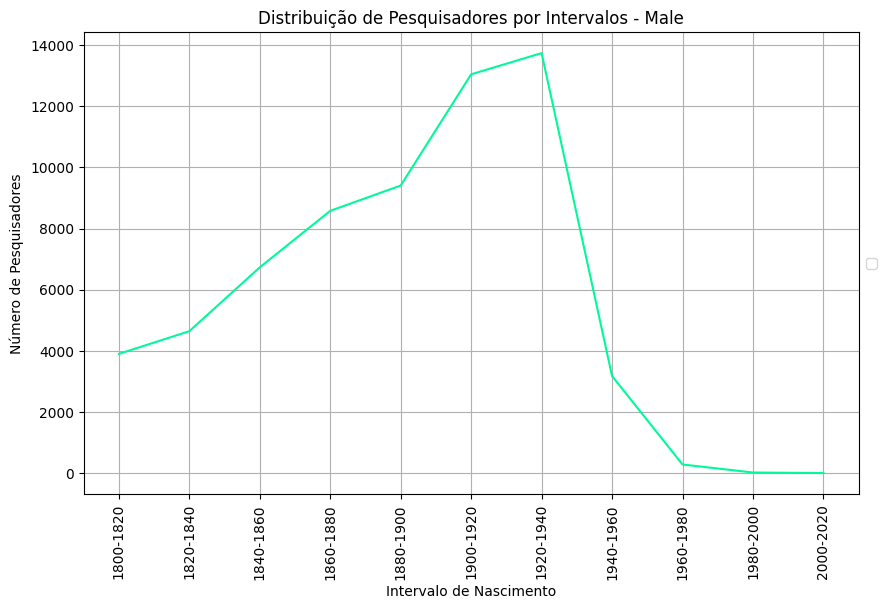

In [ ]:

#AGRUPANDO OS DADOS CONFORME O GÊNERO
dados_por_genero = pesquisadores.groupby(['Gender', 'Data_Nascimento_Intervalos']).size().unstack()


cores=['#FF00FF','#00FA9A' ]

#CRIANDO OS GRÁFICOS CONFORME O GÊNERO
for genero, dados in dados_por_genero.iterrows():
    plt.figure(figsize=(10, 6))
    plt.plot(dados.index, dados.values, color=cores[0] if genero == 'Female' else cores[1])
    plt.title(f'Distribuição de Pesquisadores por Intervalos - {genero}')
    plt.xlabel('Intervalo de Nascimento')
    plt.ylabel('Número de Pesquisadores')
    plt.xticks(rotation=90)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    plt.show()

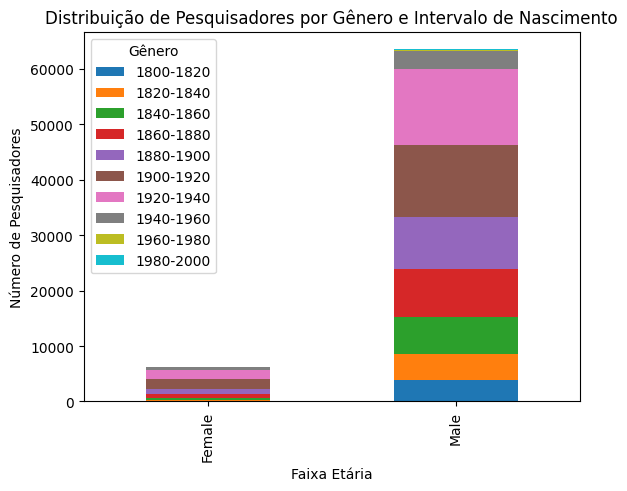

In [ ]:
frequencia_pesquisadores_data_nascimento_intervalos.plot(kind='bar', stacked=True)
plt.title('Distribuição de Pesquisadores por Gênero e Intervalo de Nascimento')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Pesquisadores')
plt.legend(title='Gênero')
plt.show()

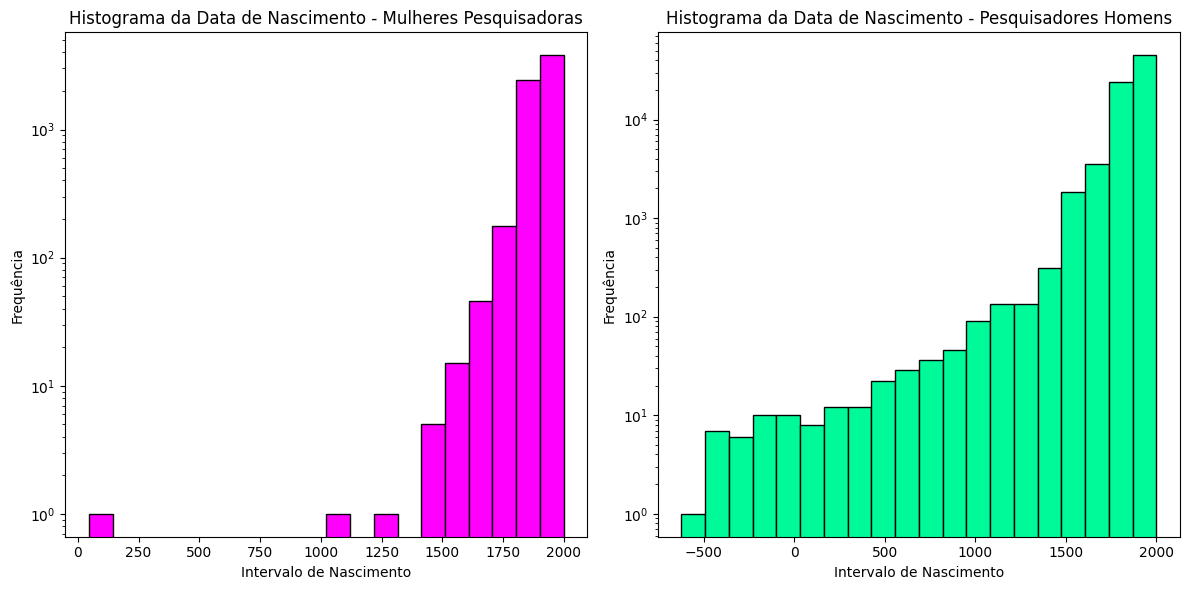

In [ ]:
#CRIANDO OS HISTOGRMAS
plt.figure(figsize=(12, 6))

# Histograma para mulheres
plt.subplot(1, 2, 1)
plt.hist(pesquisadores[pesquisadores['Gender'] == 'Female']['Birth year'], bins=20, color='#FF00FF', edgecolor='black')
plt.yscale('log')
plt.title('Histograma da Data de Nascimento - Mulheres Pesquisadoras')
plt.xlabel('Intervalo de Nascimento')
plt.ylabel('Frequência')

# Histograma para homens
plt.subplot(1, 2, 2)
plt.hist(pesquisadores[pesquisadores['Gender'] == 'Male']['Birth year'], bins=20, color='#00FA9A', edgecolor='black')
plt.yscale('log')
plt.title('Histograma da Data de Nascimento - Pesquisadores Homens')
plt.xlabel('Intervalo de Nascimento')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

In [ ]:
2.2 MEDIDAS DE CENTRALIDADE E VARIABILIDADE

In [ ]:
#CALCULANDO AS MEDIDAS DE CENTRALIDADE E VARIABILIDADE
print("Medidas de Centralidade e Variabilidade:")
print("Idade de Morte:")
print(pesquisadores['Age of death'].describe())
print("")
print("Ano de Nascimento:")
print(pesquisadores['Birth year'].describe())
print("")
print("Ano de Morte:")
print(pesquisadores['Death year'].describe())
print("")

#CALCULANDO ALGUMAS VARIÁVEIS PARA MODA
moda_genero = pesquisadores['Gender'].mode()[0]
print(f"Moda do gênero: {moda_genero}")
print("")
moda_ano_morte = pesquisadores['Age of death'].mode()[0]
print(f"Moda do ano de morte: {moda_ano_morte}")

Medidas de Centralidade e Variabilidade:
Idade de Morte:
count    81735.000000
mean        73.095956
std         14.164052
min         11.000000
25%         65.000000
50%         75.000000
75%         84.000000
max         99.000000
Name: Age of death, dtype: float64

Ano de Nascimento:
count    81735.000000
mean      1858.168068
std        118.661613
min       -624.000000
25%       1839.000000
50%       1888.000000
75%       1920.000000
max       2000.000000
Name: Birth year, dtype: float64

Ano de Morte:
count    81735.000000
mean      1931.264024
std        122.030291
min       -547.000000
25%       1908.000000
50%       1962.000000
75%       1999.000000
max       2021.000000
Name: Death year, dtype: float64

Moda do gênero: Male

Moda do ano de morte: 80.0


In [ ]:
#CALCULANDO AS MEDIDAS DE CENTRALIDADE E VARIABILIDADE POR GÊNERO
print("Medidas de Centralidade por Gênero:")
print("Idade de Morte:")
print(pesquisadores['Age of death'].groupby(pesquisadores['Gender']).describe())
print("")
print("Ano de Nascimento:")
print(pesquisadores['Birth year'].groupby(pesquisadores['Gender']).describe())
print("")
print("Ano de Morte:")
print(pesquisadores['Death year'].groupby(pesquisadores['Gender']).describe())
print("")

Medidas de Centralidade por Gênero:
Idade de Morte:
          count       mean        std   min   25%   50%   75%   max
Gender                                                             
Female   6501.0  76.705122  14.610290  11.0  68.0  80.0  88.0  99.0
Male    75234.0  72.784087  14.081576  11.0  64.0  75.0  83.0  99.0

Ano de Nascimento:
          count         mean         std    min     25%     50%     75%  \
Gender                                                                    
Female   6501.0  1898.364252   54.586853   45.0  1883.0  1909.0  1927.0   
Male    75234.0  1854.694699  122.017120 -624.0  1835.0  1885.0  1918.0   

           max  
Gender          
Female  2000.0  
Male    2000.0  

Ano de Morte:
          count         mean         std    min     25%     50%     75%  \
Gender                                                                    
Female   6501.0  1975.069374   56.821250  116.0  1959.0  1991.0  2009.0   
Male    75234.0  1927.478786  125.375779 -547.0

3. FORMULAÇÃO DE HIPÓTESE
**Hipótese exploratória:** Os homens pesquisadores tendem a terem maior notoriedade que as pesquisadoras mulheres, sendo assim mais reconhecidos.


**Hipótese usando tabelas**: A criação das tabelas de comparação dos dados e apoio da hipótese exploratória.

4. **Conclusão**
Apenas 8% dos pesquisadores nessa base de dados são mulheres. Existindo periodos da em que não existe o registro de nenhuma pesquisadora mulher. Entre diversas outras discrepancias observadas no dados em relação ao Gênero.  
Através da análise desse banco de dados foi possivel comprovar a inferencia de que as mulheres pesquisadoras não tem a mesma notoriedade dos pesquisadores homens, pois somado ao contexto histórico sabemos que mulheres não recebem o devido reconhecimento por suas descobertas e pesquisas.
Inclusive é de conhecimento geral que no decorrer da história as mulheres que faziam qualquer coisa fora do padrão eram desencorajadas e até mesmo mortas, um exemplo disso é que na idade média, mulheres ciêntistas sobretudo pesquisadoras eram consideradas bruxas e queimadas em fogueiras em praças publicas. Essa discrepância entre os gêneros nessa base de dados não se deve à falta das mulheres pesquisadora, mas sim à falta de reconhecimento das mesmas.